# Use Simple Kmeans, DBScan, Hierachical clustering algorithms for clustering. Compare the performance of clusters by changing the parameters involved in the algorithms.

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

colors = ['#a83232', '#298f4f', '#ebb134','#4285F4', '#03fcca', '#a503fc', '#bf398a']

In [3]:
data = pd.read_csv("HTRU_2.csv", header=None)

Data Source: http://archive.ics.uci.edu/ml/datasets/HTRU2

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey (South)

**Column Headings**
1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
data_2d = PCA(n_components=2).fit_transform(data.iloc[:,:-1])

In [6]:
X_std = pd.DataFrame(StandardScaler().fit_transform(data_2d))

In [7]:
X_std.describe()

,0,1
count,1.789800e+04,1.789800e+04
mean,-6.987123e-17,4.287553e-17
std,1.000028e+00,1.000028e+00
min,-1.219425e+00,-1.499744e+00
25%,-6.336800e-01,-5.676867e-01
50%,-1.794998e-01,-3.031079e-01
75%,3.403617e-01,1.089286e-01
max,9.984484e+00,5.700185e+00


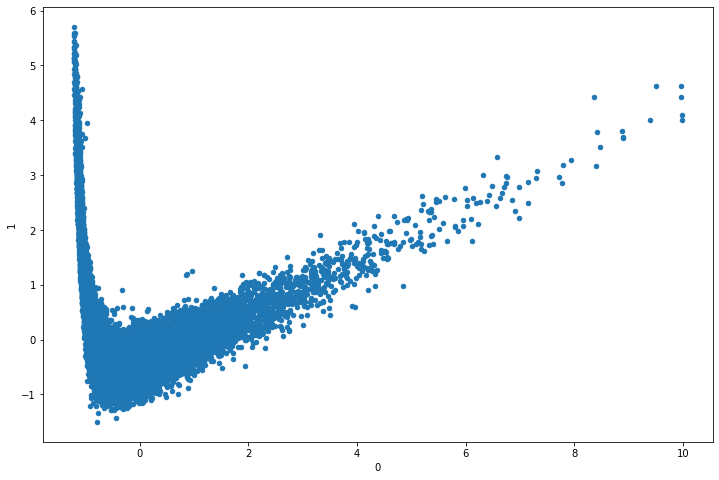

In [8]:
X_std.plot(kind="scatter", x=0, y=1, figsize=(12,8))
plt.show()

## KMeans

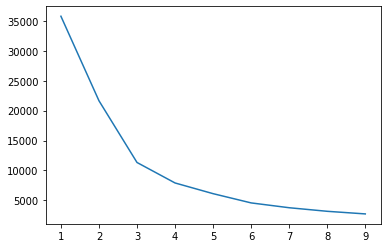

In [9]:
# Find k value
sse = []
list_k = list(range(1,10))
for k in list_k:
    sse.append(KMeans(n_clusters=k).fit(X_std).inertia_)
plt.plot(list_k, sse, )
plt.show()

Sum of squared distance flattens out after k=4. So k=4 is chosen

In [10]:
km = KMeans(n_clusters=4, n_init = 100, max_iter=100)
km.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
pred1 = km.predict(X_std)
km_clusters = list(set(pred1))
km_centroids = km.cluster_centers_
km_clusters

[0, 1, 2, 3]

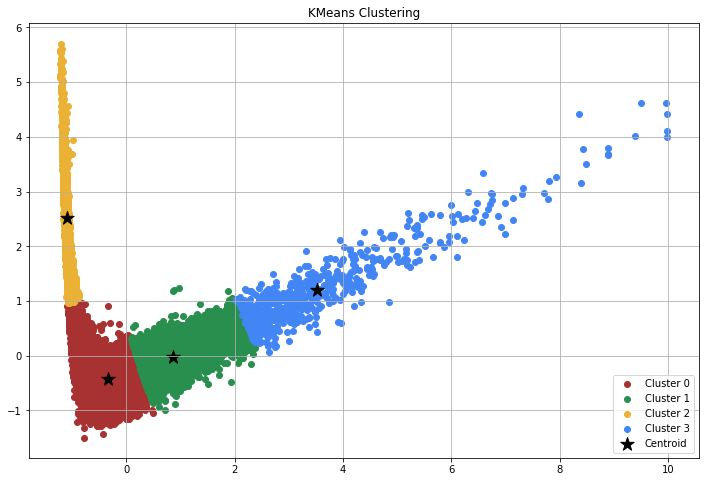

In [12]:
plt.figure(figsize=(12,8))
plt.grid()
ax = plt.gca()
for label in km_clusters:
    ax.scatter(
        X_std.iloc[:,0].iloc[pred1==label],
        X_std.iloc[:,1].iloc[pred1==label],
        c = colors[label], label = f'Cluster {label}'
    )
ax.scatter(km_centroids[:,0], km_centroids[:,1], c = 'black', marker='*', s=200, label = 'Centroid')
plt.legend()
plt.title('KMeans Clustering')
plt.show()

In [13]:
confusion_matrix(pred1, data.iloc[:,-1])

array([[10767,   596,     0,     0],
       [ 4187,    39,     0,     0],
       [  694,   996,     0,     0],
       [  611,     8,     0,     0]])

The cluster on top left in the above chart has the highest number of positive pulsar observations.

## DBScan

In [14]:
db = DBSCAN(eps=.2, min_samples=5)
db.fit(X_std)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [15]:
pred2 = db.labels_
db_clusters = list(set(pred2))

In [16]:
db_clusters.remove(-1)
db_clusters

[0, 1, 2, 3, 4, 5]

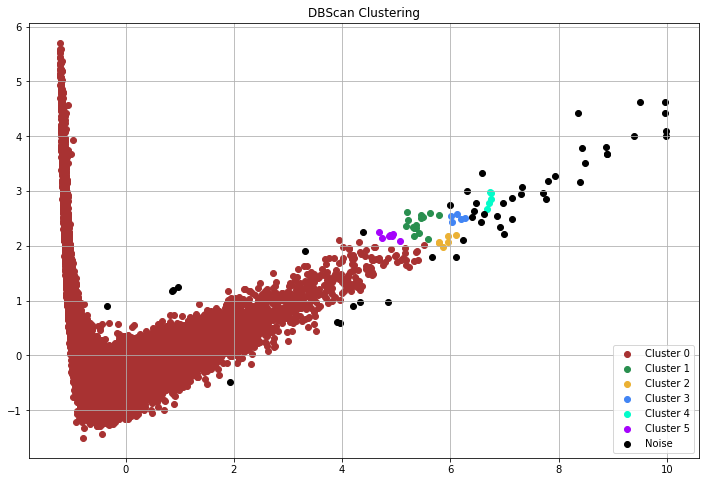

In [17]:
plt.figure(figsize=(12,8))
plt.grid()
ax = plt.gca()
for label in db_clusters:
    ax.scatter(
        X_std.iloc[:,0].iloc[pred2==label],
        X_std.iloc[:,1].iloc[pred2==label],
        c = colors[label], label = f'Cluster {label}'
    )
ax.scatter(
    X_std.iloc[:,0].iloc[pred2==-1],
    X_std.iloc[:,1].iloc[pred2==-1],
    c = 'black', label = 'Noise'
)
plt.legend()
plt.title('DBScan Clustering')
plt.show()

## Hierarchical

In [18]:
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X_std)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [19]:
pred3 = agg.labels_
agg_clusters = list(set(pred3))
agg_clusters

[0, 1]

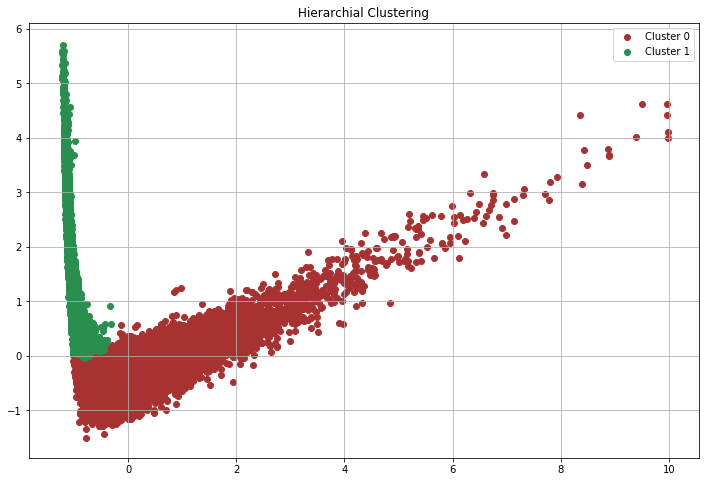

In [20]:
plt.figure(figsize=(12,8))
plt.grid()
ax = plt.gca()
for label in agg_clusters:
    ax.scatter(
        X_std.iloc[:,0].iloc[pred3==label],
        X_std.iloc[:,1].iloc[pred3==label],
        c = colors[label], label = f'Cluster {label}'
    )
plt.legend()
plt.title('Hierarchial Clustering')
plt.show()

In [21]:
confusion_matrix(pred3, data.iloc[:,-1])

array([[15108,   231],
       [ 1151,  1408]])

## Conclusion

KMeans and Hierarchical clustering give the best results for this data. One of the clusters formed consists most of the positive pulsar detections. The DBScan method does not give any useful clusters. A large cluster with a few very small clusters are formed.